<a href="https://colab.research.google.com/github/fatihgumuss/machine-learning-and-nlp/blob/main/ML_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


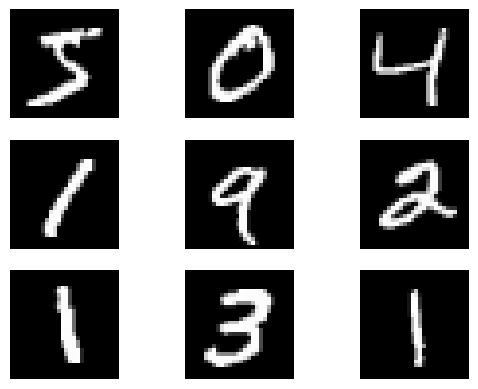

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis("off")

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train/255.0
X_test = X_test/255.0

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)

X_train.shape (60000, 784)
X_test.shape (10000, 784)


In [ ]:
def init_params():
    # TODO: initialize weight with np.random.normal
    W1 = np.random.normal(size=(120, 784))
    b1 = np.random.normal(size=(120, 1))
    W2 = np.random.normal(size=(10, 120))
    b2 = np.random.normal(size=(10, 1))
    return W1, b1, W2, b2

def RelU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)



def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X.T) + b1
    A1 = RelU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def one_hot(Y):
    #TODO: implement one-hot encoding function 5 -> [0 0 0 0 0 1 0 0 0 0]   8 - > [0 0 0 0 0 0 0 0  0 1 0]
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def deriv_Relu(Z):
    return Z>0

def back_prop(Z1, A1, Z2, A2, W2, X, Y, loss):
    #convert Y to one-hot encoding
    one_hot_Y = one_hot(Y)
    #calculate loss and append to global variable loss
    loss_value = -np.sum(one_hot_Y * np.log(A2 + 1e-8)) / Y.size
    loss.append(loss_value)

    dZ2 = A2 - one_hot_Y

    dW2 = np.dot(dZ2, A1.T) / Y.size

    db2 = np.mean(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * deriv_Relu(Z1)

    dW1 = np.dot(dZ1, X) / Y.size

    db1 = np.mean(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):

    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2


In [ ]:
def get_predictions(A2):
    return np.argmax(A2,0)

def  get_accuracy(predictions, Y):
    print(predictions, Y)

    return np.sum(predictions==Y)/Y.size

def gradient_descent(X, Y, iterations, alpha, loss, ite):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y, loss)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        ite.append(i)
        if(i%10==0):
            print(f"iteration:{i}")
            print("Accuracy", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2


In [ ]:
loss = []
ite = []
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 200, 0.5, loss, ite)

iteration:0
[6 3 5 ... 6 3 2] [5 0 4 ... 5 6 8]
Accuracy 0.055933333333333335
iteration:10
[3 0 0 ... 7 0 5] [5 0 4 ... 5 6 8]
Accuracy 0.5473166666666667
iteration:20
[3 0 0 ... 5 0 5] [5 0 4 ... 5 6 8]
Accuracy 0.6024833333333334
iteration:30
[3 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
Accuracy 0.6373666666666666
iteration:40
[3 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
Accuracy 0.65925
iteration:50
[3 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
Accuracy 0.6739166666666667
iteration:60
[3 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
Accuracy 0.68625
iteration:70
[3 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
Accuracy 0.69655
iteration:80
[3 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
Accuracy 0.7069666666666666
iteration:90
[3 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
Accuracy 0.7159333333333333
iteration:100
[3 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
Accuracy 0.7243166666666667
iteration:110
[3 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
Accuracy 0.7316166666666667
iteration:120
[3 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
Accuracy 0.7388
iteration:130
[3 0 4 ... 5 0 0] [5 0 4 .

In [ ]:
sample_input_X = X_train[0]
_, _, _, A2 = forward_prop(W1, b1, W2, b2, sample_input_X)

In [ ]:
A2

array([[0.04669296, 0.04669296, 0.04669296, ..., 0.04669296, 0.04669296,
        0.04669296],
       [0.02881845, 0.02881845, 0.02881845, ..., 0.02881845, 0.02881845,
        0.02881845],
       [0.09733264, 0.09733264, 0.09733264, ..., 0.09733264, 0.09733264,
        0.09733264],
       ...,
       [0.05566611, 0.05566611, 0.05566611, ..., 0.05566611, 0.05566611,
        0.05566611],
       [0.21439567, 0.21439567, 0.21439567, ..., 0.21439567, 0.21439567,
        0.21439567],
       [0.18199521, 0.18199521, 0.18199521, ..., 0.18199521, 0.18199521,
        0.18199521]])

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[index]
    prediction = make_predictions(current_image.reshape(1, -1), W1, b1, W2, b2)[0]
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  4
Label:  4


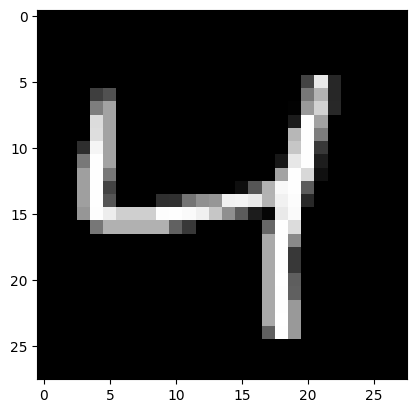

Prediction:  6
Label:  6


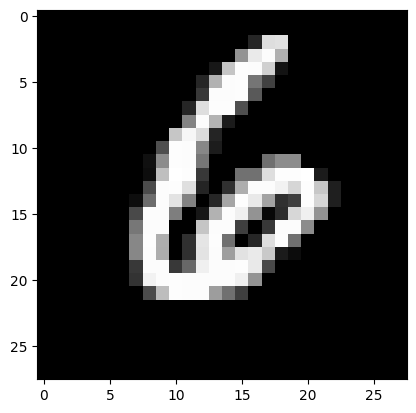

Prediction:  2
Label:  2


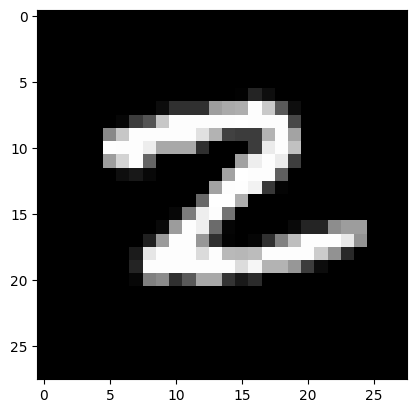

Prediction:  5
Label:  5


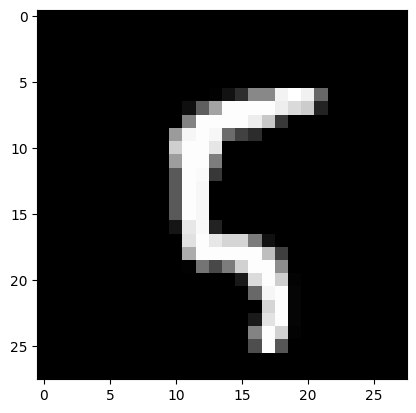

In [ ]:
test_prediction(2, W1, b1, W2, b2)
test_prediction(13, W1, b1, W2, b2)
test_prediction(143, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)

In [ ]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[7 2 1 ... 9 6 6] [7 2 1 ... 4 5 6]


0.7846

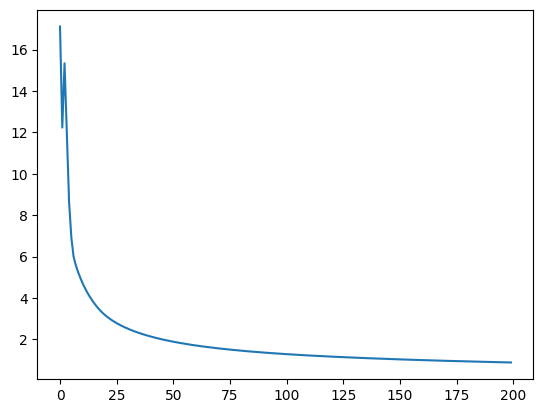

In [ ]:
plt.plot(ite, loss)